<a href="https://colab.research.google.com/github/JAUZA7ev/Analysis-of-Traffic-Violation-Patters/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/data_tilang_dummy_lengkap (1).csv')  # atau path lokal
df.head()

,Nama_Pelanggar,Jenis_Kendaraan,Jenis_Pelanggaran,Tanggal,Waktu,Lokasi,Longitude,Latitude,Status
0,"Balidin Dongoran, S.T.",Motor,Tidak Memakai Helm,2024-02-09,Sore,Jalan Proklamasi,109.671991,-6.880586,Sudah Bayar
1,Cahyono Jailani,Mobil,Melawan Arus,2025-01-09,Pagi,Jl. HOS Cokroaminoto,109.679140,-6.887627,Sudah Bayar
2,"Puji Irawan, M.Farm",Motor,Melawan Arus,2024-06-25,Siang,Jalan Proklamasi,109.667620,-6.896480,Sudah Bayar
3,Among Iswahyudi,Mobil,Melanggar Rambu Lalu Lintas,2024-01-19,Malam,Jalan Proklamasi,109.665662,-6.882276,Belum Bayar
4,Johan Suartini,Truk,Tidak Memakai Helm,2023-08-23,Siang,Jl. HOS Cokroaminoto,109.676522,-6.885439,Belum Bayar


In [ ]:
df_clean = df.drop(columns=['Nama_Pelanggar','Tanggal'])

In [ ]:
df_encoded = pd.get_dummies(df_clean, columns=['Jenis_Kendaraan', 'Jenis_Pelanggaran', 'Waktu', 'Status', 'Lokasi'])

In [ ]:
scaler = StandardScaler()
numerical = df_encoded[['Latitude', 'Longitude']]
scaled_numerical = scaler.fit_transform(numerical)

# Ganti kolom numerik dengan hasil normalisasi
df_encoded[['Latitude', 'Longitude']] = scaled_numerical

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)  # Uji dari 2 sampai 10 klaster
silhouette_scores = []

In [ ]:
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Jumlah Klaster = {k} → Silhouette Score = {score:.4f}")

Jumlah Klaster = 2 → Silhouette Score = 0.1178
Jumlah Klaster = 3 → Silhouette Score = 0.1212
Jumlah Klaster = 4 → Silhouette Score = 0.1072
Jumlah Klaster = 5 → Silhouette Score = 0.0901
Jumlah Klaster = 6 → Silhouette Score = 0.0804
Jumlah Klaster = 7 → Silhouette Score = 0.0754
Jumlah Klaster = 8 → Silhouette Score = 0.0753
Jumlah Klaster = 9 → Silhouette Score = 0.0593
Jumlah Klaster = 10 → Silhouette Score = 0.0536


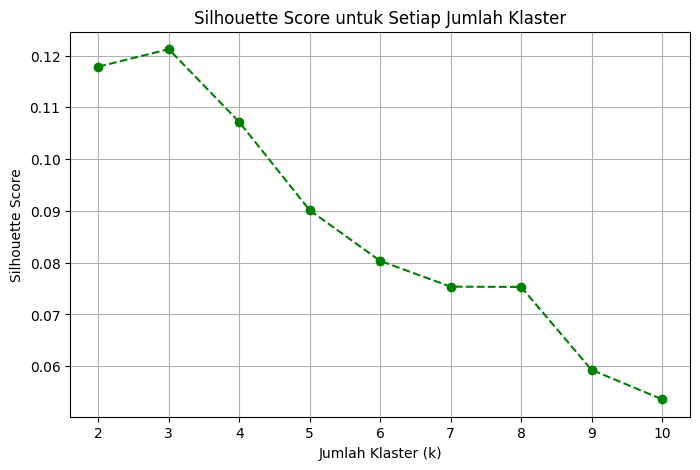

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score untuk Setiap Jumlah Klaster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_encoded['Cluster'] = kmeans_final.fit_predict(X_scaled)
df_result = df.copy()
df_result['Cluster'] = df_encoded['Cluster']

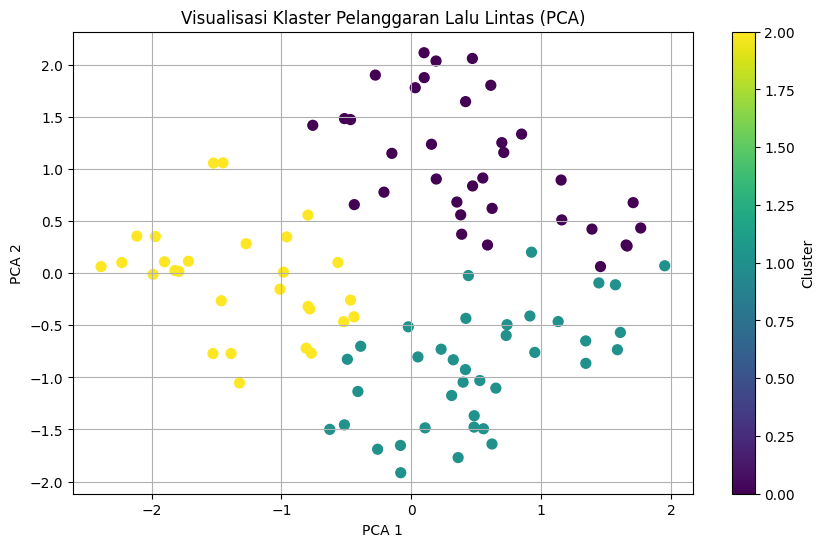

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi menjadi 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['Cluster'], cmap='viridis', s=50)
plt.title("Visualisasi Klaster Pelanggaran Lalu Lintas (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Buat peta dasar di pusat Pekalongan
m = folium.Map(location=[-6.8915, 109.6745], zoom_start=13)

# Warna klaster
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Tambahkan titik ke dalam peta
for idx, row in df_result.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row['Nama_Pelanggar']} | {row['Jenis_Pelanggaran']}",
        color=colors[int(row['Cluster']) % len(colors)],
        fill=True,
        fill_color=colors[int(row['Cluster']) % len(colors)],
        fill_opacity=0.7
    ).add_to(m)

In [2]:
! streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.210.11:8501

  Stopping...
^C
